## 1. Reading/Importing the Data

In [234]:
# data processing and analysis
import pandas as pd 
print("pandas version: {}". format(pd.__version__))

# scientific computing
import numpy as np 
print("NumPy version: {}". format(np.__version__))

# scientific and publication-ready visualization
import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

# scientific and publication-ready visualization 
import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

# machine learning algorithms
import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

# machine learning algorithms
import statsmodels
print("statsmodels version: {}". format(statsmodels.__version__))

# scientific computing and advance mathematics
import scipy as sp 
print("SciPy version: {}". format(sp.__version__))

pandas version: 0.23.4
NumPy version: 1.15.2
matplotlib version: 3.0.0
seaborn version: 0.9.0
scikit-learn version: 0.20.0
statsmodels version: 0.10.1
SciPy version: 1.1.0


In [235]:
#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

### 1.1. Reading Data from any data source (local/online repository)

In [393]:
# import train data from file
data = pd.read_csv('data/train.csv')

# a dataset should be broken into 3 splits: train, test, and (final) validation
# we will split the train set into train and test data in future sections
data_val  = pd.read_csv('data/test.csv')

# to play with our data, create copy
data1 = data.copy(deep = True)

# however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]

## 2. Understanding/Inspecting the data

### 2.1. head()

In [5]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 2.2. shape

In [7]:
data1.shape

(891, 12)

In [8]:
data_val.shape

(418, 11)

### 2.3. info()

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### 2.4. describe()

In [10]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data cleaning and preparation

### 3.5. Checking for Missing Values and Fix/Drop them

In [237]:
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [238]:
# Data description
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Nenkoff, Mr. Christo",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [394]:
for dataset in data_cleaner:    
    # age: median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    # embarked: mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    # fare: median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
    # drop Cabin as it has 687 as null out of 891 (approx 77% of data)
    dataset.drop('Cabin', axis=1, inplace=True)

In [240]:
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
----------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 3.1. Convert binary variable (e.g., Sex: male/female) to 0/1

In [395]:
# List of variables to map

varlist =  ['Sex']

# Defining the map function
def binary_map(x):
    return x.map({'male': 1, "female": 0})

# Applying the function to the housing list
for dataset in data_cleaner:
    dataset[varlist] = dataset[varlist].apply(binary_map)

In [242]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [243]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


### 3.2. For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [396]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data1['Embarked'], prefix='Embarked', drop_first=True)
    
# Adding the results to the master dataframe
data1 = pd.concat([data1, dummy1], axis=1)

In [245]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1


In [397]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data_val['Embarked'], prefix='Embarked', drop_first=True)
    
# Adding the results to the master dataframe
data_val = pd.concat([data_val, dummy1], axis=1)

In [247]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1


In [398]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data1['Pclass'], prefix='Pclass', drop_first=True)
    
# Adding the results to the master dataframe
data1 = pd.concat([data1, dummy1], axis=1)

In [249]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1,0,1


In [399]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data_val['Pclass'], prefix='Pclass', drop_first=True)
    
# Adding the results to the master dataframe
data_val = pd.concat([data_val, dummy1], axis=1)

In [251]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1,0,1


In [400]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data1['Sex'], prefix='Male', drop_first=True)
    
# Adding the results to the master dataframe
data1 = pd.concat([data1, dummy1], axis=1)

In [253]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male_1
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,1,0,1,1


In [401]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data_val['Sex'], prefix='Male', drop_first=True)
    
# Adding the results to the master dataframe
data_val = pd.concat([data_val, dummy1], axis=1)

In [255]:
data_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male_1
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0,0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,1,0,1,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,1,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,1,0,1,0


### 3.4. Create derived variables

In [402]:
data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1
data1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male_1,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,2


In [403]:
data_val['FamilySize'] = data_val['SibSp'] + data_val['Parch'] + 1
data_val.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male_1,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0,0,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1,0,1,0,2


### 3.3. Drop repeated/unnecessary Variables

In [405]:
# Renaming the column 
data1= data1.rename(columns={ 'Male_1' : 'Male'})
data_val= data_val.rename(columns={ 'Male_1' : 'Male'})

In [259]:
drop_column = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Fare', 'Embarked']
data1.drop(drop_column, axis=1, inplace = True)

In [260]:
data1.head(2)

,Survived,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male,FamilySize
0,0,22.0,1,0,0,1,0,1,1,2
1,1,38.0,1,0,0,0,0,0,0,2


In [261]:
data_val.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,1,0,0,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,1,0,1,0,2


### 3.4. Check for Outliers

In [262]:
# Checking for outliers in the continuous variables
cont_col = data1['Age']

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
cont_col.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
90%       47.000000
95%       54.000000
99%       65.000000
max       80.000000
Name: Age, dtype: float64

### 3.7. Check for correlations and fix/drop them

#### 3.7.1. Heatmap

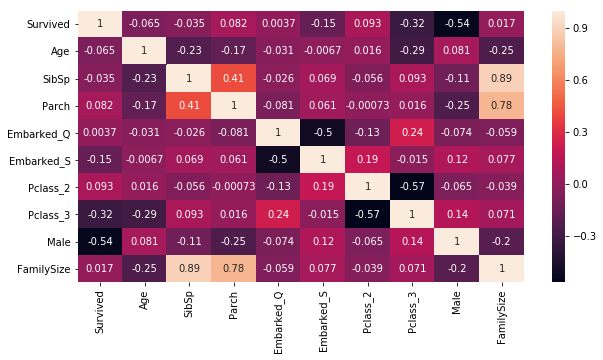

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(data1.corr(),annot = True)
plt.show()

### 2.5. Visualising the Data

In [263]:
data1.head(2)

,Survived,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male,FamilySize
0,0,22.0,1,0,0,1,0,1,1,2
1,1,38.0,1,0,0,0,0,0,0,2


#### 2.5.1. Visualise numeric values

##### 2.5.1.1. pairplot

c:\users\m1030527\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


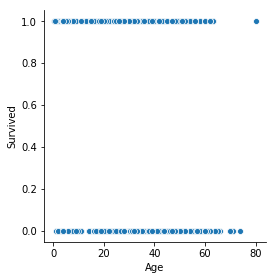

In [30]:
# Plot the scatter plot of the data

sns.pairplot(data1, x_vars=['Age'], y_vars='Survived',size=4, aspect=1, kind='scatter')
plt.show()

#### 2.5.2. Visualise categorical values

##### 2.5.2.1. boxplot

Text(0, 0.5, 'Age')

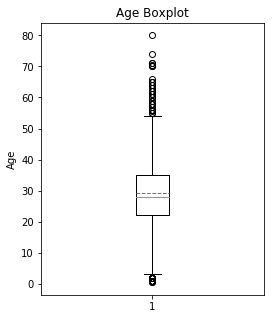

In [31]:
#graph distribution of quantitative data
plt.figure(figsize=[4,5])

#plt.subplot(231)
plt.boxplot(x=data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age')

##### 2.5.2.2. histogram

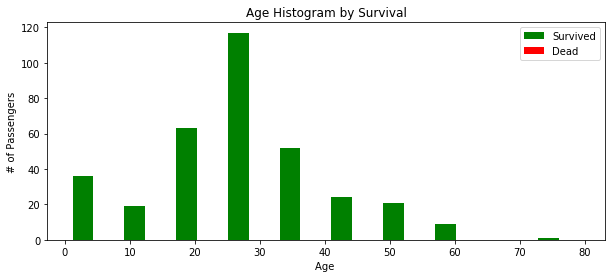

In [32]:
plt.figure(figsize=[10,4])

plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Age']==0]['Age']], 
         stacked=False, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age ')
plt.ylabel('# of Passengers')
plt.legend()

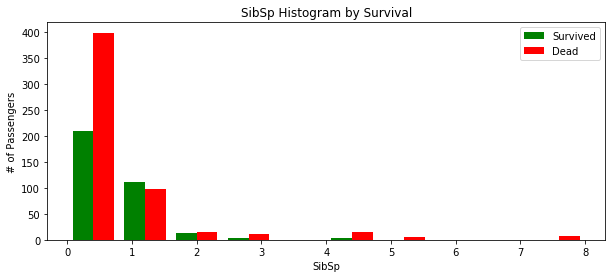

In [36]:
plt.figure(figsize=[10,4])

plt.hist(x = [data1[data1['Survived']==1]['SibSp'], data1[data1['Survived']==0]['SibSp']], 
         stacked=False, color = ['g','r'],label = ['Survived','Dead'])
plt.title('SibSp Histogram by Survival')
plt.xlabel('SibSp')
plt.ylabel('# of Passengers')
plt.legend()

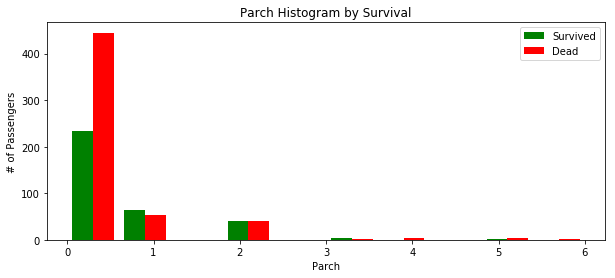

In [37]:
plt.figure(figsize=[10,4])

plt.hist(x = [data1[data1['Survived']==1]['Parch'], data1[data1['Survived']==0]['Parch']], 
         stacked=False, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Parch Histogram by Survival')
plt.xlabel('Parch')
plt.ylabel('# of Passengers')
plt.legend()

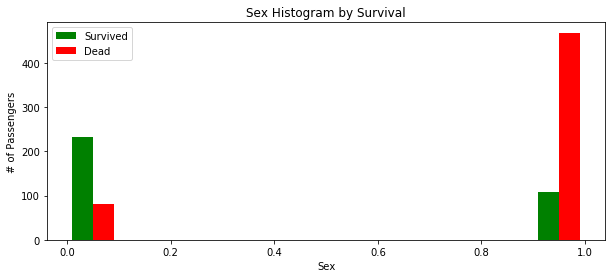

In [35]:
plt.figure(figsize=[10,4])

plt.hist(x = [data1[data1['Survived']==1]['Male'], data1[data1['Survived']==0]['Male']], 
         stacked=False, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Sex Histogram by Survival')
plt.xlabel('Sex')
plt.ylabel('# of Passengers')
plt.legend()

#### 2.5.3. heatmap

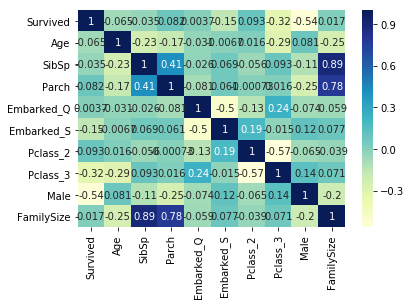

In [38]:
# Plot the heatmap of the data to show the correlation

sns.heatmap(data1.corr(), cmap="YlGnBu", annot = True)
plt.show()

## 4. Model Building

### 4.1. Train/Test split

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
# Putting feature variable to X
X = data1.drop(['Survived'], axis=1)

X.head()

,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Male,FamilySize
0,22.0,1,0,0,1,0,1,1,2
1,38.0,1,0,0,0,0,0,0,2
2,26.0,0,0,0,1,0,1,0,1
3,35.0,1,0,0,1,0,0,0,2
4,35.0,0,0,0,1,0,1,1,1


In [266]:
# Putting response variable to y
y = data1['Survived']

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [267]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [268]:
### Checking the Survival Rate
survived = (sum(data1['Survived'])/len(data1['Survived'].index))*100
survived

38.38383838383838

### 4.2. Select predictor variables

In [269]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [270]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

c:\users\m1030527\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [271]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [272]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1),
 ('Pclass_2', True, 1),
 ('Pclass_3', True, 1),
 ('Male', True, 1),
 ('FamilySize', True, 1)]

In [296]:
col = X_train.columns[rfe.support_]
col

Index(['Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S', 'Pclass_2',
       'Pclass_3', 'Male', 'FamilySize'],
      dtype='object')

In [274]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### 4.3. Build model

In [275]:
import statsmodels.api as sm

In [297]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.43
Date:                Thu, 23 Jan 2020   Deviance:                       538.86
Time:                        23:51:38   Pearson chi2:                     649.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3436      0.411      8.128      0.000       2.537       4.150
Age           -0.0382      0.010     -3.925      0.000      -0.057      -0.019
SibSp         -1.2105      0.181     -6.683      0.000      -1.565      -0.855
Parch         -1.1708      0.194     -6.044      0.000      -1.551      -0.791
Embarked_Q    -0.4390      0.470     -0.935      0.350      -1.359       0.481
Embarked_S    -0.5246      0.290     -1.811      0.070      -1.092       0.043
Pclass_2      -0.9003      0.322     -2.798      0.005      -1.531      -0.270
Pclass_3      -2.2562      0.305     -7.385      0.000      -2.855      -1.657
Male          -2.8811      0.248    -11.596      0.000      -3.368      -2.394
FamilySize     0.9623      0.123      7.847      0.000       0.722       1.203
==============================================================================
"""

In [298]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

69     0.054973
85     0.382596
794    0.090301
161    0.794880
815    0.458035
516    0.829709
299    0.899292
454    0.081328
59     0.031271
879    0.876578
dtype: float64

In [299]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05497319, 0.38259561, 0.09030147, 0.79487973, 0.45803474,
       0.82970875, 0.89929223, 0.08132757, 0.03127085, 0.87657785])

In [300]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId
0,0,0.054973,69
1,1,0.382596,85
2,0,0.090301,794
3,1,0.794880,161
4,0,0.458035,815


In [301]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,0,0.054973,69,0
1,1,0.382596,85,0
2,0,0.090301,794,0
3,1,0.794880,161,1
4,0,0.458035,815,0


In [302]:
from sklearn import metrics

In [303]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[343  47]
 [ 70 163]]


In [304]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.812199036918138


In [305]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [306]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,FamilySize,113.96
1,SibSp,31.83
2,Parch,17.12
6,Pclass_3,1.89
5,Pclass_2,1.63
3,Embarked_Q,1.50
4,Embarked_S,1.50
0,Age,1.21
7,Male,1.13


In [320]:
col = col.drop(['Parch','SibSp','FamilySize', 'Embarked_S', 'Embarked_Q'], 1)
col

Index(['Age', 'Pclass_2', 'Pclass_3', 'Male'], dtype='object')

In [321]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      618
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -276.82
Date:                Thu, 23 Jan 2020   Deviance:                       553.64
Time:                        23:55:48   Pearson chi2:                     670.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4155      0.441      7.745      0.000       2.551       4.280
Age           -0.0318      0.009     -3.493      0.000      -0.050      -0.014
Pclass_2      -0.9786      0.305     -3.205      0.001      -1.577      -0.380
Pclass_3      -2.3467      0.290     -8.093      0.000      -2.915      -1.778
Male          -2.6787      0.227    -11.804      0.000      -3.123      -2.234
==============================================================================
"""

In [322]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

69     0.080462
85     0.505042
794    0.082845
161    0.762398
815    0.461841
516    0.795194
299    0.861367
454    0.075884
59     0.123526
879    0.836995
dtype: float64

In [323]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0804621 , 0.50504173, 0.08284465, 0.7623981 , 0.46184129,
       0.7951942 , 0.86136703, 0.07588372, 0.123526  , 0.83699522])

In [324]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId
0,0,0.080462,69
1,1,0.505042,85
2,0,0.082845,794
3,1,0.762398,161
4,0,0.461841,815


In [325]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,0,0.080462,69,0
1,1,0.505042,85,1
2,0,0.082845,794,0
3,1,0.762398,161,1
4,0,0.461841,815,0


In [326]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[335  55]
 [ 70 163]]


In [327]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.7993579454253612


In [328]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [329]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,2.86
3,Male,2.76
2,Pclass_3,2.10
1,Pclass_2,1.43


### 4.4. Validate the model

In [330]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [331]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_Prob, drop_intermediate = False )

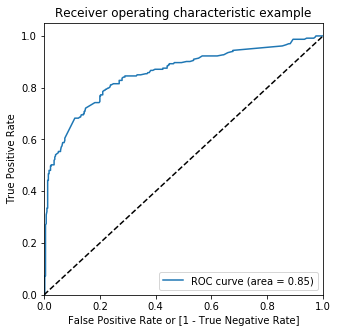

In [332]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob)

In [333]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.080462,69,0,1,0,0,0,0,0,0,0,0,0
1,1,0.505042,85,1,1,1,1,1,1,1,0,0,0,0
2,0,0.082845,794,0,1,0,0,0,0,0,0,0,0,0
3,1,0.762398,161,1,1,1,1,1,1,1,1,1,0,0
4,0,0.461841,815,0,1,1,1,1,1,0,0,0,0,0


In [334]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373997  1.000000  0.000000
0.1   0.1  0.629213  0.905579  0.464103
0.2   0.2  0.695024  0.871245  0.589744
0.3   0.3  0.762440  0.841202  0.715385
0.4   0.4  0.788122  0.785408  0.789744
0.5   0.5  0.799358  0.699571  0.858974
0.6   0.6  0.799358  0.553648  0.946154
0.7   0.7  0.797753  0.502146  0.974359
0.8   0.8  0.776886  0.424893  0.987179
0.9   0.9  0.695024  0.193133  0.994872


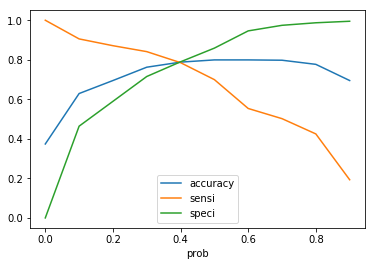

In [335]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [360]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.56 else 0)

y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.080462,69,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.505042,85,1,1,1,1,1,1,1,0,0,0,0,0
2,0,0.082845,794,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.762398,161,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.461841,815,0,1,1,1,1,1,0,0,0,0,0,0


In [361]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.8025682182985554

In [362]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[361,  29],
       [ 94, 139]], dtype=int64)

### 4.5. Predictions on Test dataset

In [363]:
X_test = X_test[col]
X_test.head()

,Age,Pclass_2,Pclass_3,Male
205,2.0,0,1,0
44,19.0,0,1,0
821,27.0,0,1,1
458,50.0,1,0,0
795,39.0,1,0,1


In [364]:
X_test_sm = sm.add_constant(X_test)

In [365]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

205    0.732080
44     0.614205
821    0.078142
458    0.700172
795    0.185272
118    0.493543
424    0.101389
678    0.426148
269    0.909152
229    0.544642
dtype: float64

In [366]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
205,0.732080
44,0.614205
821,0.078142
458,0.700172
795,0.185272


In [367]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['PassengerId'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Survived,PassengerId,0
0,0,205,0.732080
1,1,44,0.614205
2,1,821,0.078142
3,1,458,0.700172
4,0,795,0.185272


In [368]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['PassengerId','Survived','Survived_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

c:\users\m1030527\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


,PassengerId,Survived,Survived_Prob
0,205,0,0.732080
1,44,1,0.614205
2,821,1,0.078142
3,458,1,0.700172
4,795,0,0.185272


In [386]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.47 else 0)
y_pred_final.head()

,PassengerId,Survived,Survived_Prob,final_predicted
0,205,0,0.732080,1
1,44,1,0.614205,1
2,821,1,0.078142,0
3,458,1,0.700172,1
4,795,0,0.185272,0


In [387]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Survived, y_pred_final.final_predicted)

0.7947761194029851

## Step 5: Predicting for test dataset Kaggle

In [406]:
data_val_Id = data_val['PassengerId']
data_val = data_val[col]
data_val.head()

,Age,Pclass_2,Pclass_3,Male
0,34.5,0,1,1
1,47.0,0,1,0
2,62.0,1,0,1
3,27.0,0,1,1
4,22.0,0,1,0


In [407]:
data_val_sm = sm.add_constant(data_val)

y_val_pred = res.predict(data_val_sm)
y_val_pred[:10]

0    0.062610
1    0.395396
2    0.098690
3    0.078142
4    0.591386
5    0.113570
6    0.528841
7    0.255793
8    0.621706
9    0.093028
dtype: float64

In [408]:
# Converting y_val to a dataframe which is an array
y_val_1 = pd.DataFrame(y_val_pred)

# Let's see the head
y_val_1.head()

,0
0,0.062610
1,0.395396
2,0.098690
3,0.078142
4,0.591386


In [409]:
data_val.head()

,Age,Pclass_2,Pclass_3,Male
0,34.5,0,1,1
1,47.0,0,1,0
2,62.0,1,0,1
3,27.0,0,1,1
4,22.0,0,1,0


In [410]:
# Renaming the column 
y_val_1= y_val_1.rename(columns={ 0 : 'Survived_Prob'})

# Putting CustID to index
y_val_1['PassengerId'] = data_val_Id

y_val_1['final_predicted'] = y_val_1.Survived_Prob.map(lambda x: 1 if x > 0.57 else 0)
y_val_1.head()

,Survived_Prob,PassengerId,final_predicted
0,0.062610,892,0
1,0.395396,893,0
2,0.098690,894,0
3,0.078142,895,0
4,0.591386,896,1


In [411]:
output = pd.DataFrame({'PassengerId': y_val_1.PassengerId, 'Survived': y_val_1.final_predicted})
output.to_csv('my_submission_GLM.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
Kaggle Score: 0.77990